In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, Normalizer
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [2]:
def draw_line(coef,intercept, mi, ma):
    # for the separating hyper plane ax+by+c=0, the weights are [a, b] and the intercept is c
    # to draw the hyper plane we are creating two points
    # 1. ((b*min-c)/a, min) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the minimum value of y
    # 2. ((b*max-c)/a, max) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the maximum value of y
    points=np.array([[((-coef[1]*mi - intercept)/coef[0]), mi],[((-coef[1]*ma - intercept)/coef[0]), ma]])
    plt.plot(points[:,0], points[:,1])

# What if Data is imabalanced

<pre>
1. As a part of this task you will observe how linear models work in case of data imbalanced
2. observe how hyper plane is changs according to change in your learning rate.
3. below we have created 4 random datasets which are linearly separable and having class imbalance
4. in the first dataset the ratio between positive and negative is 100 : 2, in the 2nd data its 100:20, 
in the 3rd data its 100:40 and in 4th one its 100:80
</pre>

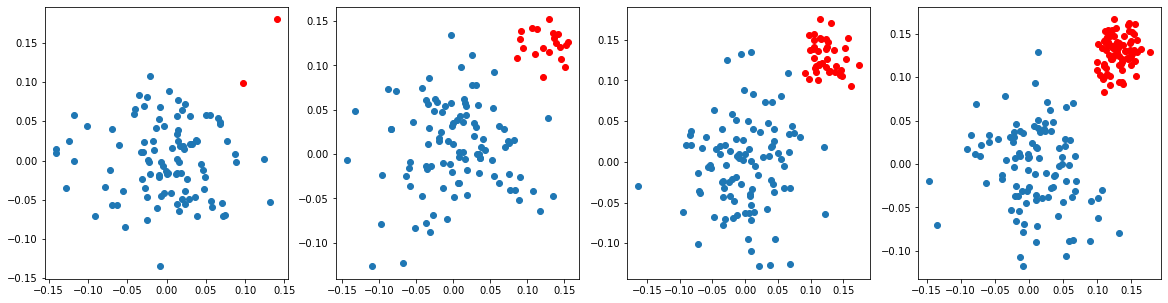

In [3]:
# here we are creating 2d imbalanced data points 
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
plt.figure(figsize=(20,5))
for j,i in enumerate(ratios):
    plt.subplot(1, 4, j+1)
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))
    plt.scatter(X_p[:,0],X_p[:,1])
    plt.scatter(X_n[:,0],X_n[:,1],color='red')
plt.show()

> your task is to apply SVM (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC'>sklearn.svm.SVC</a>) and LR (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>sklearn.linear_model.LogisticRegression</a>) with different regularization strength [0.001, 1, 100]

## Task 1: Applying SVM

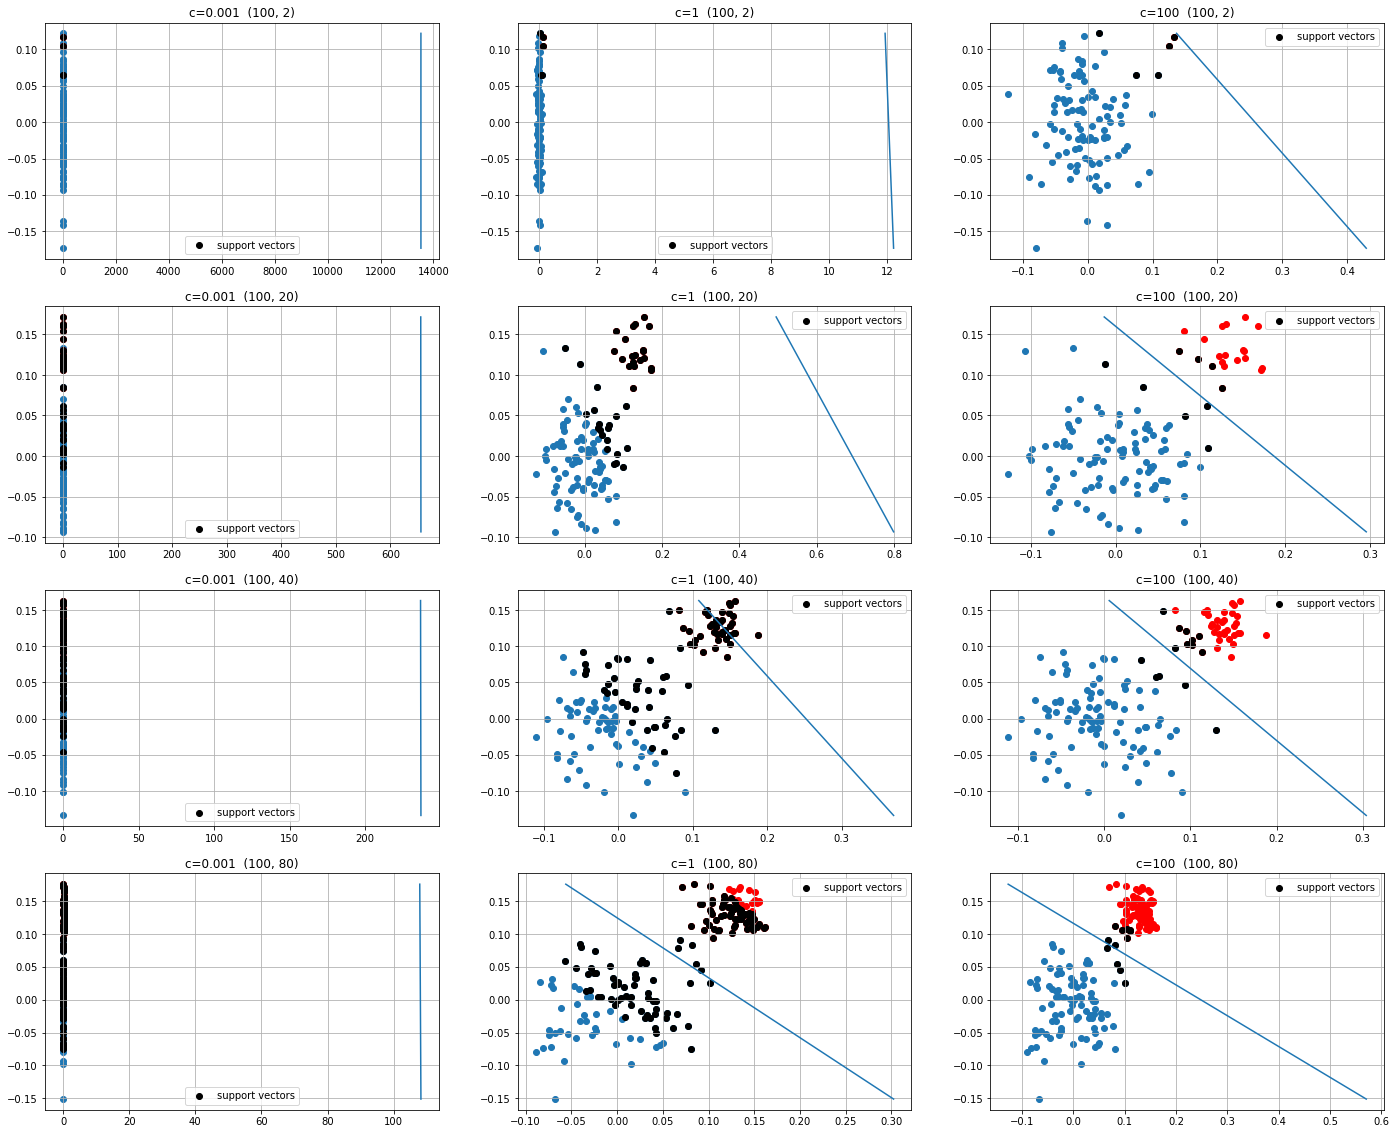

In [8]:
# Using random.seed to save the state of randomness
np.random.seed(15)
idx_subplot=0
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
c = [0.001, 1, 100]
plt.figure(figsize=(24,20))
for j,i in enumerate(ratios):
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))
    for k in range(3):
        idx_subplot += 1
        plt.subplot(4,3,idx_subplot)
        plt.title("c="+str(c[k])+"  "+str(i))
        plt.grid()
        plt.scatter(X_p[:,0],X_p[:,1])
        plt.scatter(X_n[:,0],X_n[:,1],color='red')
        clf=SVC(kernel="linear",C=c[k],random_state=15)
        clf.fit(X,y)  # Calculating the w(weight) and b(intercept)
        weight=clf.coef_
        intercept=clf.intercept_
        sv=clf.support_vectors_
        
        plt.scatter(sv[:,0],sv[:,1],color="black",label='support vectors')
        plt.legend()
        mi=min(X[:,1])
        mx=max(X[:,1])
        draw_line(weight[0],intercept,mi,mx)

### Observations -

1. For a linear kernel, we just need to optimize the c parameter.
2. C adds a penalty for each misclassified data point. Penalty is directly proportional to the distance to the decision boundary.
3. From above plots, when C is small, the penalty for misclassified points is low so a decision boundary with a large margin is chosen at the expense of a greater number of misclassification.
4. When C is large, SVM tries to minimize the number of misclassified points due to the high penalty which results in a decision boundary with a smaller margin.
5. Higher C may lead to overfitting due to low regularization strength.

## Task 2: Applying LR

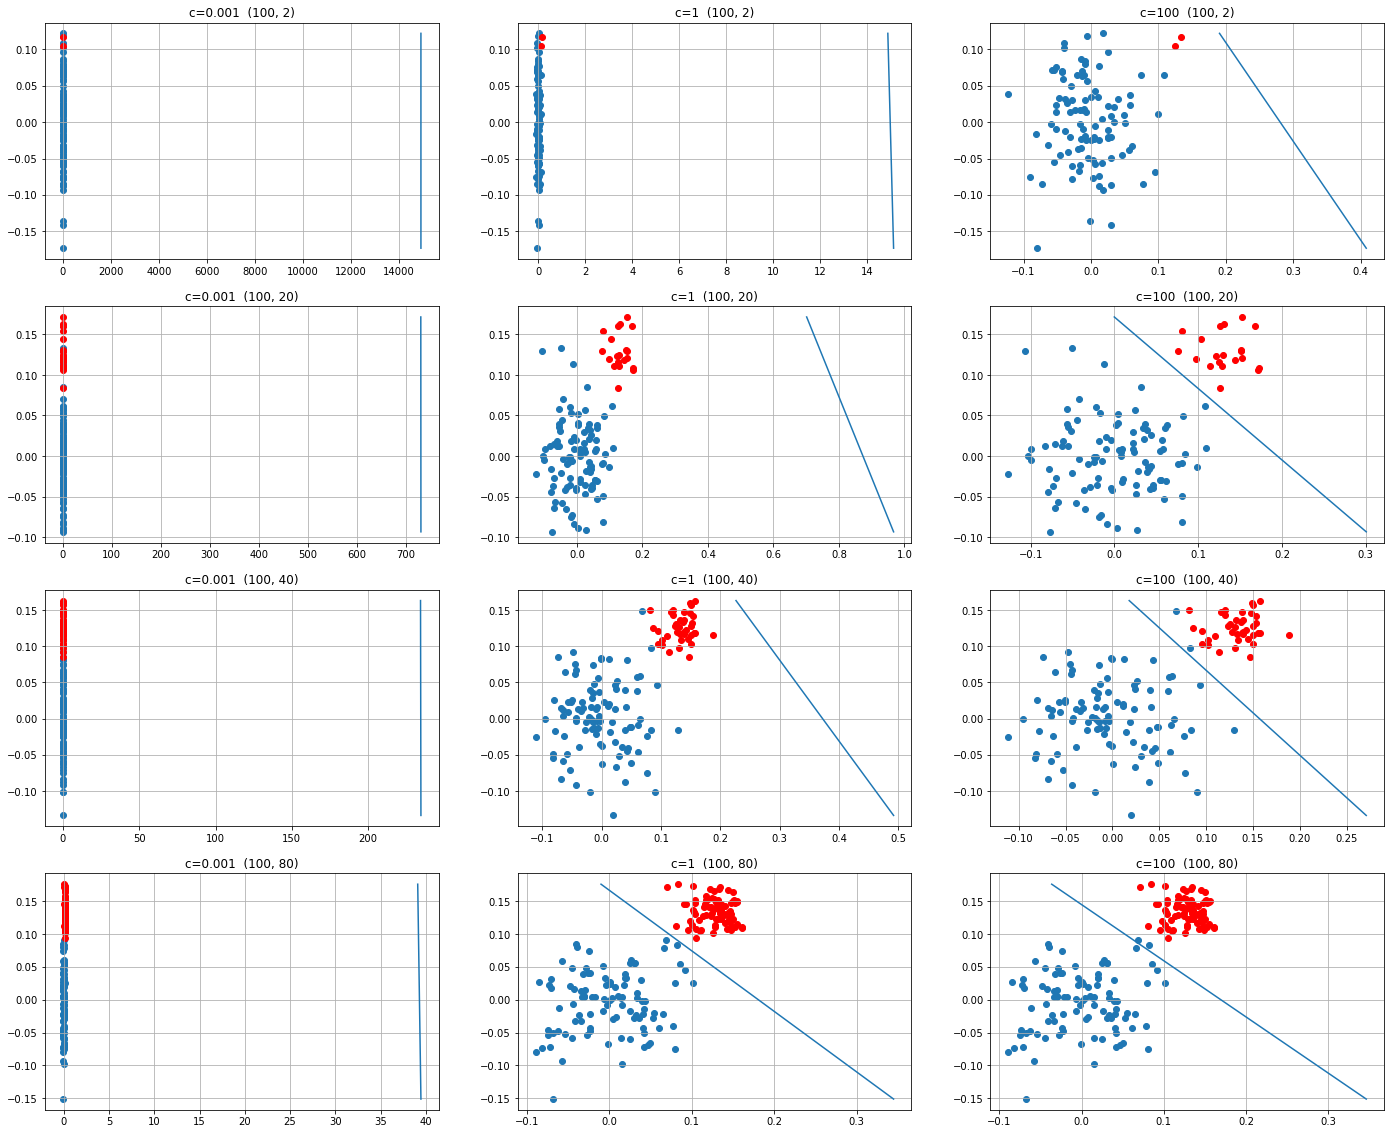

In [9]:
# Using random.seed to save the state of randomness
np.random.seed(15)
idx_subplot=0
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
c = [0.001, 1, 100]
plt.figure(figsize=(24,20))
for j,i in enumerate(ratios):
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))
    for k in range(3):
        idx_subplot += 1
        plt.subplot(4,3,idx_subplot)
        plt.title("c="+str(c[k])+"  "+str(i))
        plt.grid()
        plt.scatter(X_p[:,0],X_p[:,1])
        plt.scatter(X_n[:,0],X_n[:,1],color='red')
        clf = LogisticRegression(C=c[k],random_state=15)
        clf.fit(X,y)
        weight=clf.coef_
        intercept=clf.intercept_
        mi=min(X[:,1])
        mx=max(X[:,1])
        draw_line(weight[0],intercept,mi,mx)

### Observations -

1. 'C' is a hyperparameter which is inverse of regularization strength.
2. Regularization will penalize the extreme parameters, the extreme values in the training data leads to overfitting.
3. A high value of C tells the model to give more weight to the training data.
4. As we can observe from above plots, lower value of c i.e. higher regularization causing underfitting(higher bias). It is classifying everypoints under one single class.
5. As c increases regularization strength decreases it tries to reduce underfit and it tries to recognize dataset has 2 classes.
6. At larger C, it will begin to overfit.